In [1]:
from numpy import *
from matplotlib.pyplot import *
import numpy.fft as fft
from wavtools import *
from imtools import *
import sympy as sy

In [2]:
#Exercice n°1.1
def myDFT(v):
    N = size(v)
    [k,n] = meshgrid(range(N),range(N))
    M = exp(-2j* np.pi*k*n/N)
    TF = M.dot(v)
    return TF

In [3]:
v = array([1,2,3,4])
print(myDFT(v))
print(fft.fft(v))

[10.+0.00000000e+00j -2.+2.00000000e+00j -2.-9.79717439e-16j
 -2.-2.00000000e+00j]
[10.+0.j -2.+2.j -2.+0.j -2.-2.j]


In [4]:
def myiDFT(v):
    N = size(v)
    return conj(myDFT(conj(v)))/N

In [5]:
v = array([1,2,3,4])
print(myiDFT(v))
print(fft.ifft(v))

[ 2.5-0.0000000e+00j -0.5-5.0000000e-01j -0.5+2.4492936e-16j
 -0.5+5.0000000e-01j]
[ 2.5+0.j  -0.5-0.5j -0.5+0.j  -0.5+0.5j]


In [6]:
print(myDFT(myiDFT(v)))

[1.+5.55111512e-16j 2.+2.98739775e-16j 3.+1.14423775e-17j
 4.-2.66113379e-16j]


In [7]:
#Exercice n°2.1
def myFFT(v):
    N = size(v)
    if N ==1:
        return v
    else:
        vpair = v[::2]
        vimpair = v[1::2]
        upair = myFFT(vpair)
        uimpair = myFFT(vimpair)
        u = zeros(N,complex)
        for k in range (N//2):
            u[k]=upair[k]+exp(-2j*pi*k/N)*uimpair[k]
            u[k+N//2]=upair[k]-exp(-2j*pi*k/N)*uimpair[k]
        return u

In [8]:
v = array([1,2,3,4])
print(myFFT(v))
print(fft.fft(v))

[10.+0.j -2.+2.j -2.+0.j -2.-2.j]
[10.+0.j -2.+2.j -2.+0.j -2.-2.j]


In [9]:
def myiFFT(v):
    N = size(v)
    return conj(myFFT(conj(v)))/N

In [10]:
v = array([1,2,3,4])
print(myiFFT(v))
print(fft.ifft(v))

[ 2.5-0.j  -0.5-0.5j -0.5+0.j  -0.5+0.5j]
[ 2.5+0.j  -0.5-0.5j -0.5+0.j  -0.5+0.5j]


In [11]:
def myFFT2(v):
    N = v.shape[0]
    u = zeros((N,N),complex)
    w = zeros((N,N),complex)
    for m in range(N):
        u[m,:] = myFFT(v[m,:])
    for n in range(N):
        w[:,n] = myFFT(u[:,n])
    return w

In [12]:
v = array([[1,2,3,4],
          [5,6,7,8],
          [9,10,11,12],
          [13,14,15,16]])
print(myFFT2(v))
print(fft.fft2(v))

[[136. +0.j  -8. +8.j  -8. +0.j  -8. -8.j]
 [-32.+32.j   0. +0.j   0. +0.j   0. +0.j]
 [-32. +0.j   0. +0.j   0. +0.j   0. +0.j]
 [-32.-32.j   0. +0.j   0. +0.j   0. +0.j]]
[[136. +0.j  -8. +8.j  -8. +0.j  -8. -8.j]
 [-32.+32.j   0. +0.j   0. +0.j   0. +0.j]
 [-32. +0.j   0. +0.j   0. +0.j   0. +0.j]
 [-32.-32.j   0. +0.j   0. +0.j   0. +0.j]]


In [13]:
def myiFFT2(v):
    N = size(v)
    return conj(myFFT2(conj(v)))/N

In [14]:
v = array([[1,2,3,4],
          [5,6,7,8],
          [9,10,11,12],
          [13,14,15,16]])
print(myiFFT2(v))
print(fft.ifft2(v))

[[ 8.5-0.j  -0.5-0.5j -0.5+0.j  -0.5+0.5j]
 [-2. -2.j   0. -0.j   0. -0.j   0. -0.j ]
 [-2. +0.j   0. -0.j   0. -0.j   0. -0.j ]
 [-2. +2.j   0. -0.j   0. -0.j   0. -0.j ]]
[[ 8.5+0.j  -0.5-0.5j -0.5+0.j  -0.5+0.5j]
 [-2. -2.j   0. +0.j   0. +0.j   0. +0.j ]
 [-2. +0.j   0. +0.j   0. +0.j   0. +0.j ]
 [-2. +2.j   0. +0.j   0. +0.j   0. +0.j ]]


In [15]:
#Exercice n°3
def reverb(u,f):
    fr = resize(f,u.size)
    fr = fr/fr.sum()
    fr[0] = 1
    v = fft.fft(u)
    w = fft.fft(fr)
    P = v*w
    return fft.ifft(P).real

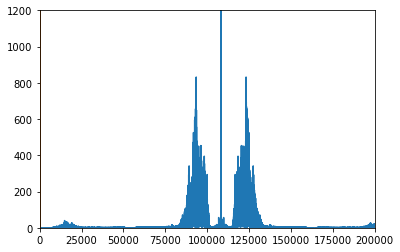

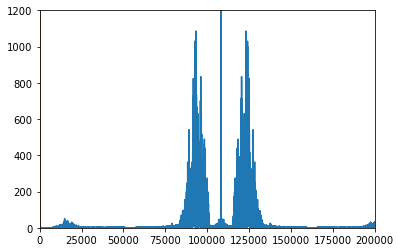

In [16]:
signal, freq = open_wave('bird.wav')
signal2, freq2 = open_wave('garage.wav')
S = reverb(signal,signal2)
save_wave(S,'TP3bird.wav',freq)
#play_wave('TP3bird.wav')

x = np.linspace(0,size(signal),size(signal))
plot(x,fft.fftshift(abs(fft.fft(signal))),axis([0,200000,0,1200]))
show()

x = np.linspace(0,size(S),size(S))
plot(x,fft.fftshift(abs(fft.fft(S))),axis([0,200000,0,1200]))
show()

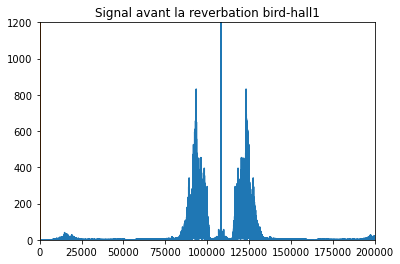

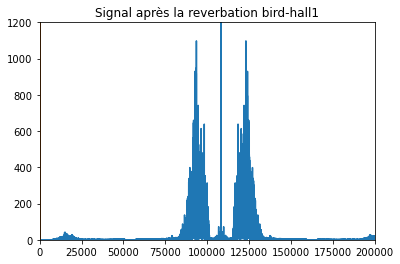

In [29]:
signal,freq = open_wave('bird.wav')
signal2,freq2 = open_wave('garage.wav')
signal3,freq3 = open_wave('drum.wav')
signal4,freq4 = open_wave('hall1.wav')
signal5,freq5 = open_wave('tictac.wav')
signal6,freq6 = open_wave('hall2.wav')

R = reverb(signal,signal4)

y = linspace(0,size(signal),size(signal))
plot(y,fft.fftshift(abs(fft.fft(signal))),axis([0,200000,0,1200]))
title("Signal avant la reverbation bird-hall1")
show()

x = linspace(0,size(R),size(R))
plot(x,fft.fftshift(abs(fft.fft(R))),axis([0,200000,0,1200]))
title("Signal après la reverbation bird-hall1")
show()

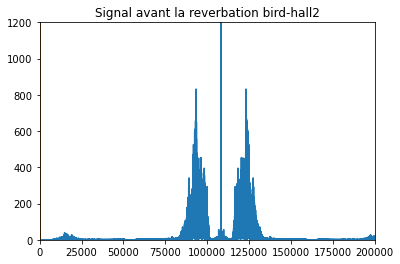

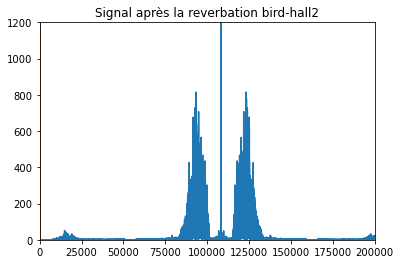

In [33]:
R = reverb(signal,signal6)

y = linspace(0,size(signal),size(signal))
plot(y,fft.fftshift(abs(fft.fft(signal))),axis([0,200000,0,1200]))
title("Signal avant la reverbation bird-hall2")
show()

x = linspace(0,size(R),size(R))
plot(x,fft.fftshift(abs(fft.fft(R))),axis([0,200000,0,1200]))
title("Signal après la reverbation bird-hall2")
show()

In [17]:
#Exercice n°4
def rotate1(v,theta):
    N = v.shape[0]
    w = zeros((N,N))
    [x,y] = meshgrid(range(N),range(N))
    xc = (x/N) - 0.5
    yc = (y/N) - 0.5
    xn = xc*cos(theta)-yc*sin(theta)
    yn = xc*sin(theta)+yc*cos(theta)
    xn = (numpy.round((xn+0.5)*N)).astype(int64)
    yn = (numpy.round((yn+0.5)*N)).astype(int64)
    xn[(xn < 0)|(xn>=N)] = 0
    yn[(yn < 0)|(yn>=N)] = 0
    w[x,y] = v[xn,yn]
    return w
    

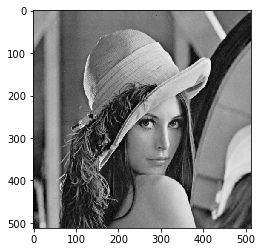

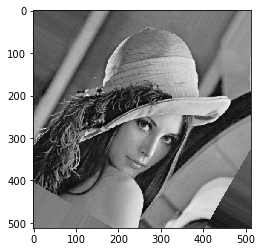

In [18]:
v = open_image('lena.png')
display_image(v)
theta = radians(30)
display_image(rotate1(v,theta))

In [19]:
def enlarge(v):
    N = v.shape[0]
    w = zeros((2*N,2*N))
    a = int(N/2)
    b = int(3*N/2)
    w[a:b,a:b]=v
    return w

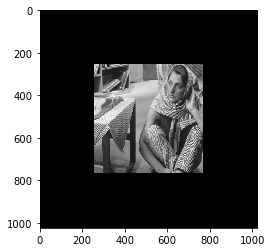

In [20]:
v = open_image('barbara.png')
display_image(enlarge(v))

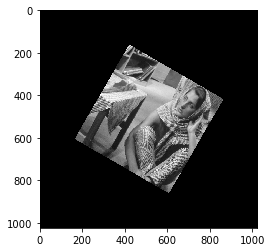

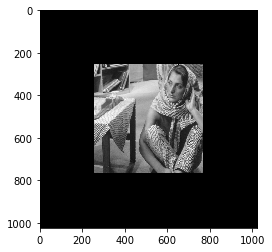

In [21]:
v = open_image('barbara.png')
theta = radians(30)
display_image(rotate1(enlarge(v),theta))
u = rotate1(enlarge(v),theta)
theta = radians(-30)
display_image(rotate1(u,theta))

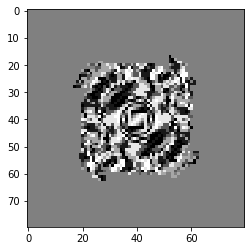

In [22]:
N = 40
Z = zeros((N,N))
[n,m] = meshgrid(range(N),range(N))
Z[n,m] = cos(8*pi*(n+m)/N)
A = enlarge(Z)
for i in range(36):
    A = rotate1(A,radians(10))
display_image(A)

In [23]:
theta = sy.symbols('theta')
a = sy.tan(theta/2)
b = sy.sin(theta)
Mx = sy.Matrix([[1,'a'],[0,1]])
My = sy.Matrix([[1,0],['b',1]])
Rtheta = Mx*My*Mx
print(Rtheta)

Matrix([[a*b + 1, a*(a*b + 1) + a], [b, a*b + 1]])


In [24]:
sy.simplify(Rtheta)
sy.simplify(Rtheta.subs(sy.sin(theta),sy.sin(theta/2)*sy.cos(theta/2)))

Matrix([
[a*b + 1, a*(a*b + 2)],
[      b,     a*b + 1]])

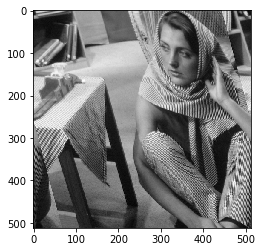

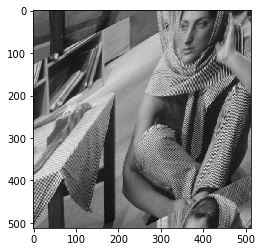

In [25]:
#Exo5.6
def Xshear(v,a):
    n,m=v.shape
    v_fft = numpy.fft.fft(v,axis=1)
    v_fft_shift = numpy.fft.fftshift(v_fft)
    
    xi = numpy.fft.fftfreq(n,1.0/n)
    
    [X,Y]= numpy.meshgrid(range(n),range(n))
    v_fft[X,Y] = v_fft_shift[X,Y]*numpy.exp(2.0j*numpy.pi*a*(Y/n-1/2)*xi[X])
    
    v_fft_shift = numpy.fft.fftshift(v_fft)
    v_ifft = numpy.fft.ifft(v_fft_shift,axis=1)
    return numpy.real(v_ifft)
def Yshear(v,b):
    v = numpy.transpose(v)
    vf = numpy.transpose(Xshear(v,b))
    return vf

v = open_image('barbara.png')

theta = radians(30)
a = -tan(theta/2)
b = sin(theta)
display_image(Xshear(v,a))
display_image(Yshear(v,b))

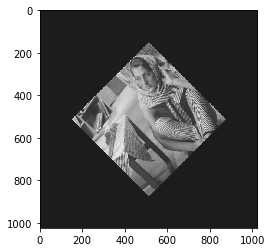

In [26]:
def rotate2(v,theta):
    theta = radians(45)
    a = -tan(theta/2)
    b = sin(theta)
    I1 = Xshear(v,a)
    I2 = Yshear(I1,b)
    result = Xshear(I2,a)
    return result   
display_image(rotate2(enlarge(v),theta))